In [1]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

2024-07-22 08:02:36.014744: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 08:02:36.014851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 08:02:36.155045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

preprocessor_config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("cuda:0")

config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

LlavaNextForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Q

In [4]:
# prepare image and text prompt, using the appropriate prompt template
url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
prompt = "[INST] <image>\nWhat is shown in this image? [/INST]"

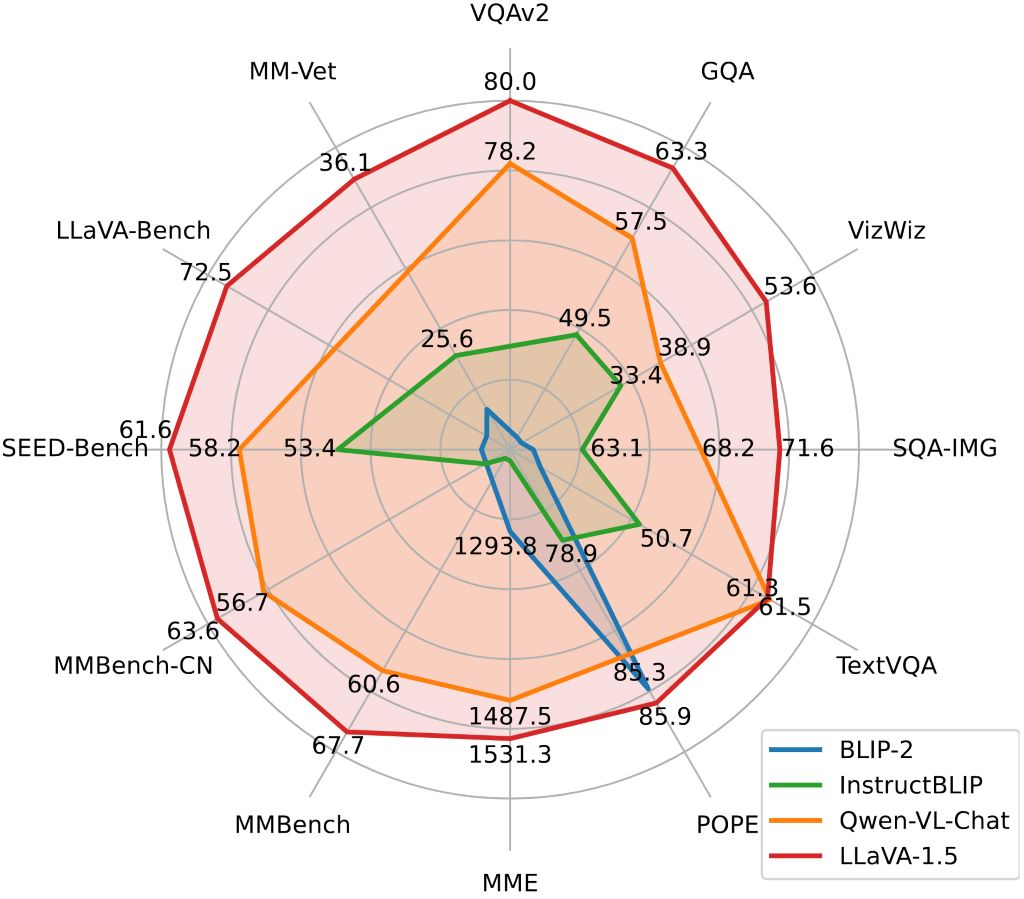

In [8]:
image

In [5]:
inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

In [6]:
# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=100)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


In [7]:
print(processor.decode(output[0], skip_special_tokens=True))

[INST]  
What is shown in this image? [/INST] The image appears to be a radar chart, which is a type of multi-dimensional plot that displays values for multiple quantitative variables represented on axes starting from the same point. This particular radar chart is showing the performance of different models or systems across various metrics.

The axes represent different metrics or benchmarks, such as MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-


In [9]:
image1 = Image.open('/kaggle/input/ocr-test-data/image (2).jpg')

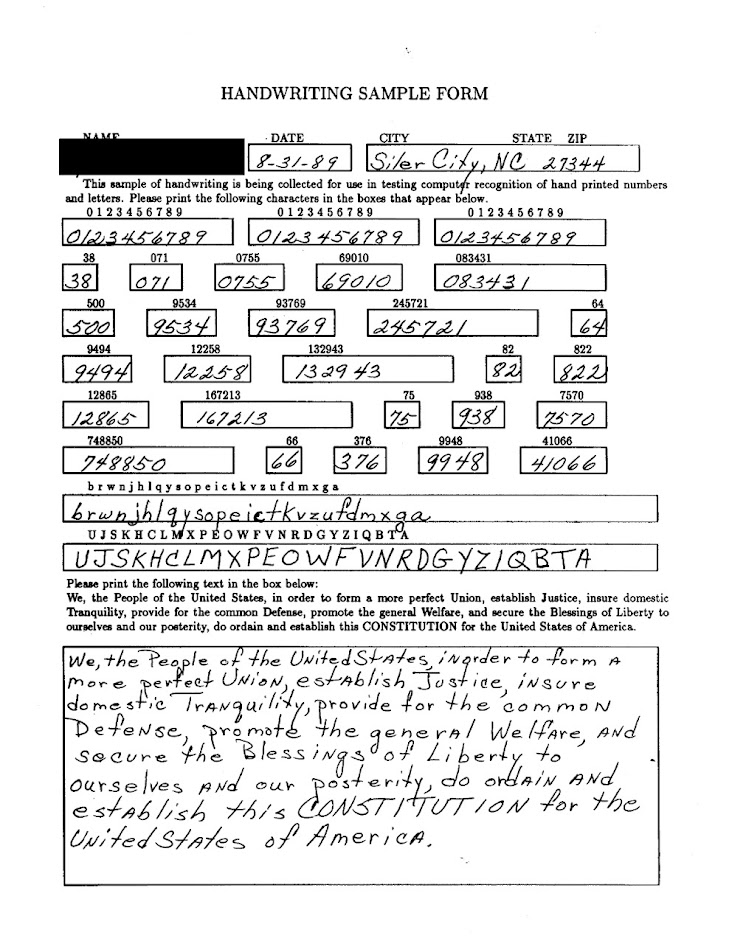

In [11]:
image1

In [10]:
prompt = "[INST] <image>\nCan you tell me what is written in the image? [/INST]"

In [12]:
inputs = processor(prompt, image1, return_tensors="pt").to("cuda:0")

In [13]:
# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=500)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [14]:
print(processor.decode(output[0], skip_special_tokens=True))

[INST]  
Can you tell me what is written in the image? [/INST] The image contains a handwritten sample form with various fields filled out. Here is the information that is visible:

- NAME: The name is redacted and appears to be blacked out.
- DATE: The date is "8-31-89."
- CITY: The city is "Silver City, NC 27344."
- ZIP: The zip code is "27344."
- STATE: The state is "North Carolina."
- ADDRESS: The address is "123 Main St."
- PHONE: The phone number is "910-555-1234."
- SOCIAL SECURITY NUMBER: The SSN is redacted and appears to be blacked out.
- DRIVER'S LICENSE NUMBER: The license number is redacted and appears to be blacked out.
- MILITARY SERVICE: The military service is "US Army."
- RANK: The rank is "E4."
- DATE OF ENLISTMENT: The date is "1-1-89."
- DATE OF DISCHARGE: The date is "1-1-94."
- BRANCH OF SERVICE: The branch is "Infantry."
- COMBAT RELATED INJURY: The answer is "No."
- PRISONER OF WAR: The answer is "No."
- SEPARATION REASON: The reason is "Honorable Discharge."
-